In [1]:
# Mandatory cell for the rest of this assignment

%load_ext autoreload
%autoreload 2

from sys import path

path.append('../scripts')

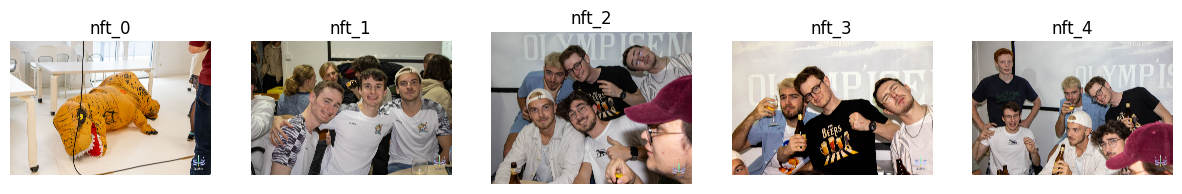

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

list_nft = {}

for i in range(0, 100):
    nftId = f"nft_{i}"
    list_nft[nftId] = f"../nft_images/{nftId}.jpg"

# Affichage des 5 premières images avec leur ID
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for idx, (nftId, imagePath) in enumerate(list_nft.items()):
    if idx >= 5:
        break
    try:
        image = Image.open(imagePath)
        axes[idx].imshow(image)
        axes[idx].set_title(nftId)
        axes[idx].axis('off')
    except FileNotFoundError:
        print(f"Image non trouvée : {imagePath}")
        axes[idx].set_title(f"{nftId}\n[Manquante]")
        axes[idx].axis('off')

plt.show()

In [3]:
# Import des modules nécessaires
from node import BlockchainNode
from network import Node
from wallet import Wallet
from proof_of_stake import ProofOfStake
from smart_contract import SmartContractDefinition, SmartContractWritingOperation

# Création de plusieurs wallets pour les nœuds de la blockchain
walletNode1 = Wallet()
walletNode2 = Wallet()
walletNode3 = Wallet()

# Création d'un wallet utilisateur (ex: Alice)
walletAlice = Wallet()

# Initialisation du mécanisme de Proof of Stake avec le premier nœud
pos = ProofOfStake(walletNode1.publicKey)

#On reset le network
Node.reset_network()

#On connecte les 3 noeuds au network
node1 = BlockchainNode(walletNode1,pos)
node2 = BlockchainNode(walletNode2,pos)
node3 = BlockchainNode(walletNode3,pos)

assert len(Node.get_all_nodes())==3
"Success"

'Success'

In [4]:
# Exemple de source de code pour le smart contract
source_code = """
class MyNFTContract:
    def __init__(self, issuerPublicKey):
        self.issuerPublicKey = issuerPublicKey
        self.nfts = {}  # Dictionnaire des NFTs

    def mint(self, ownerPublicKey, nftId):
        if nftId not in self.nfts:
            self.nfts[nftId] = ownerPublicKey
            print(f"NFT {nftId} frappé par {ownerPublicKey}")
        else:
            raise ValueError(f"NFT {nftId} déjà existant")

    def transfer(self, senderPublicKey, receiverPublicKey, nftId):
        if nftId in self.nfts and self.nfts[nftId] == senderPublicKey:
            self.nfts[nftId] = receiverPublicKey
            print(f"NFT {nftId} transféré de {senderPublicKey} à {receiverPublicKey}")
        else:
            raise ValueError("NFT inexistant ou propriété invalide")
"""

# Création du Smart Contract (définition)
contract_definition = SmartContractDefinition(issuerPublicKey=walletAlice.publicKey, sourceCode=source_code, Ntoken=5)

# Signer le certificat
walletAlice.sign(contract_definition)

# Instanciation du Smart Contract
contract_instance = contract_definition.instantiate_contract()

# Ajouter le Smart Contract au premier nœud (node1)
node1.new_certificate(contract_definition) # Ajouter le smart contract au nœud

print(node1.blockchain.blockList)
print(node2.blockchain.blockList)
print(node3.blockchain.blockList)

Échec du forger du bloc. Diffusion du certificat : <smart_contract.SmartContractDefinition object at 0x000002B3C7BEEA50>
Échec du forger du bloc. Diffusion du certificat : <smart_contract.SmartContractDefinition object at 0x000002B3C7BEEA50>
Échec du forger du bloc. Diffusion du certificat : <smart_contract.SmartContractDefinition object at 0x000002B3C7BEEA50>


In [5]:
# Frapper un NFT pour Alice via node1
contract_definition.mint(ownerPublicKey="Alice", nftId="NFT1")

ValueError: La période de frappe est fermée.

In [ ]:
print(contract_definition.owners)

In [ ]:
#Transferer un NFT de Alice à Edouard
contract_definition.transfer(senderPublicKey="Alice", receiverPublicKey="Edouard", nftId="NFT1")
print(contract_definition.owners)